In [1]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading dataset from Google drive
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Internship/Task - 1'
Data = pd.read_csv(path+ '/retail_sales_dataset.csv')
Data.head()

Mounted at /content/drive


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
# Checking nulls values
Data.info()
Data.isnull().sum()
Data['Age'] = pd.to_numeric(Data['Age'])
Data['Date'] = pd.to_datetime(Data['Date'])
Data['Month'] = Data['Date'].dt.to_period('M')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [4]:
# Most Sold Product Category
Date_groups = Data.groupby('Product Category')

print("Quantity Sold by Product Category")
Date_groups['Quantity'].describe()

Quantity Sold by Product Category


,count,mean,std,min,25%,50%,75%,max
Product Category,,,,,,,,
Beauty,307.0,2.511401,1.100668,1.0,2.0,3.0,3.0,4.0
Clothing,351.0,2.547009,1.142647,1.0,1.5,3.0,4.0,4.0
Electronics,342.0,2.482456,1.153084,1.0,1.0,2.0,4.0,4.0


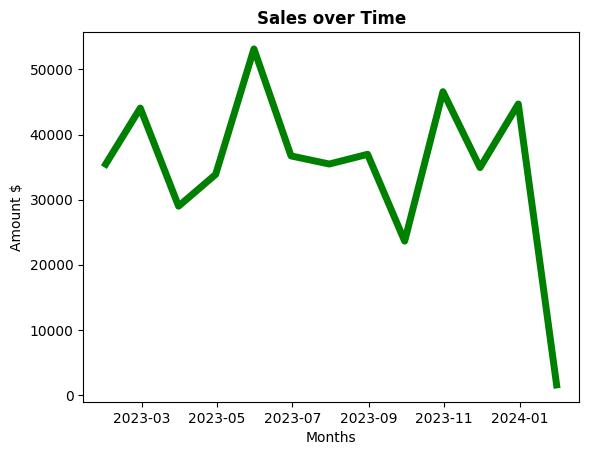

In [5]:
# Sales analysis over time
Data.set_index('Date',inplace=True)

M_Sales = Data['Total Amount'].resample('ME').sum()

plt.title('Sales over Time',fontweight= 'bold')
plt.xlabel('Months')
plt.ylabel('Amount $')

plt.plot(M_Sales.index,M_Sales.values,linewidth=5,color='g')
plt.show()

In [6]:
Gender_grp = Data.groupby(['Gender'])
print('Total Aggregated Sales: {}'.format(Data['Total Amount'].sum()))
Gender_grp.agg({'Total Amount': 'sum'}).reset_index()

Total Aggregated Sales: 456000


,Gender,Total Amount
0,Female,232840
1,Male,223160


In [7]:
G_PC_Q_grp = Data.groupby(['Gender','Product Category'])
G_PC_Q_grp.agg({'Quantity':'sum'}).reset_index()

,Gender,Product Category,Quantity
0,Female,Beauty,418
1,Female,Clothing,441
2,Female,Electronics,439
3,Male,Beauty,353
4,Male,Clothing,453
5,Male,Electronics,410


In [8]:
# most age group
Data['Age'] = pd.cut(Data['Age'], bins=[0,18,25,35,45,55,65,100], labels=['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66-100'], right=False)
age_g_per = Data['Age'].value_counts(normalize=True)*100
age_g_per


,proportion
Age,
46-55,22.5
56-65,21.6
36-45,20.7
26-35,20.3
19-25,14.9
0-18,0.0
66-100,0.0


#**Recomendations as per insight**


*   **Focus on Peak Sales Months:** Since we observed the highest sales in June
    2023, consider implementing promotional campaigns or special events during this month to maximize revenue. Analyzing what factors contributed to this spike could provide insights for future strategies.
*   **Address January Sales Drop:** The drastic drop in sales observed in January 2024 warrants investigation. Consider conducting customer surveys to understand the reasons behind this decline. Strategies to boost sales during this period could include targeted marketing campaigns or special discounts.


*   **Target Female Customers:** With females being the highest spenders, tailor marketing efforts and promotions specifically aimed at this demographic. This could include personalized offers, loyalty programs, and targeted advertising to enhance engagement.

*   **Leverage Popular Product Categories:** Clothing emerged as the most sold category. Consider expanding the clothing line by introducing new styles or exclusive collections to capitalize on this trend. Additionally, assess customer feedback to understand preferences and improve product offerings.


*   **Engage the 46-55 Age Group:** Since most customers fall within the 46-55 age range, tailor marketing strategies to appeal to this demographic. This could involve creating products that resonate with their lifestyle and preferences, as well as targeted promotions.








